In [1]:
import scipy.io as io
import numpy as np

In [2]:
test_datamat = io.loadmat('indian_pines_Test_patch_3.mat')
test_data = test_datamat['test_patch']
test_labels = test_datamat['test_labels'].transpose()

train_datamat = io.loadmat('indian_pines_Train_patch_3.mat')
train_data = train_datamat['train_patch']
train_labels = train_datamat['train_labels'].transpose()

In [3]:
train_labels1 = train_labels.ravel()
trainLabels = np.zeros((train_labels1.size, train_labels1.max()+1))
trainLabels[np.arange(train_labels1.size),train_labels1] = 1

In [4]:
test_labels1 = test_labels.ravel()
testLabels = np.zeros((test_labels1.size, test_labels1.max()+1))
testLabels[np.arange(test_labels1.size),test_labels1] = 1

In [5]:
train_data.shape

(1600, 220, 3, 3)

In [6]:
import numpy as np
import keras
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Lambda, Flatten, Input, Conv2D, Conv1D, Reshape, Concatenate

inp = Input(shape=train_data.shape[1:])

c1 = Conv2D(220, kernel_size = 1, activation="relu", data_format="channels_first")(inp)
re1 = Reshape((10, 22, 3*3), input_shape = c1.shape)(c1)
out = []
for i in range(10):
    reshape1 = Lambda(lambda x: x[:,i,:,:])(re1)  
    conv1 = Conv1D(filters = 20, kernel_size = 3, strides = 1, activation="relu")(reshape1)
    conv2 = Conv1D(filters = 20, kernel_size = 3, strides = 1, activation="relu")(conv1)
    conv3 = Conv1D(filters = 10, kernel_size = 3, strides = 1, activation="relu")(conv2)
    conv4 = Conv1D(filters = 5, kernel_size = 5, strides = 1, activation="relu")(conv3)
    reshape2 = Reshape((60, 1), input_shape = conv4.shape)(conv4)
    out.append(reshape2)
outConc = keras.layers.concatenate(out)
reshape3 = Flatten()(outConc)
dense = Dense(256, activation='relu')(reshape3)
op = Dense(9, activation='softmax')(dense)
model = Model(inputs=[inp], outputs=op)

Using TensorFlow backend.


(None, 220, 3, 3)


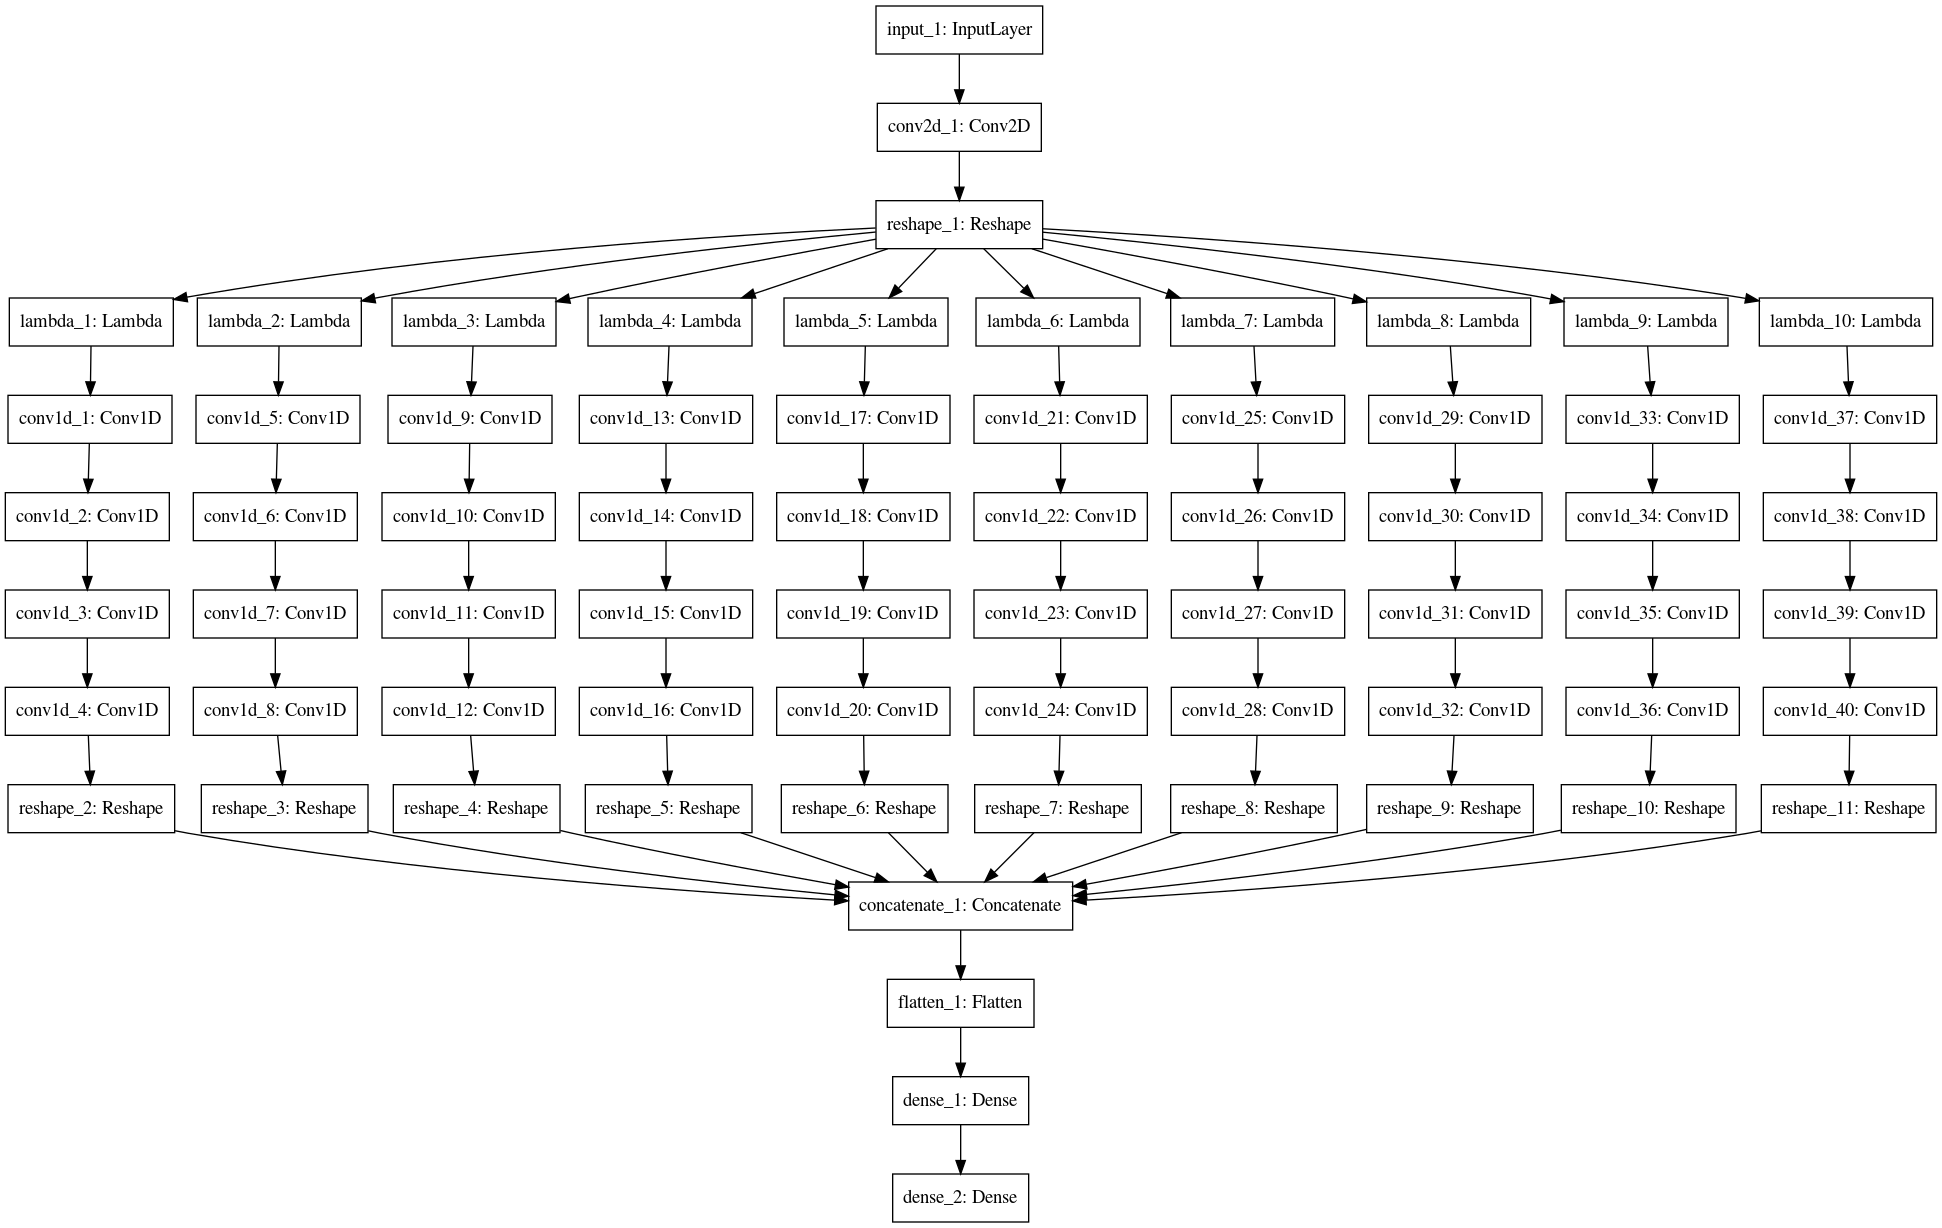

In [7]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_data, trainLabels, validation_data=(test_data, testLabels), epochs=200)

Train on 1600 samples, validate on 7434 samples
Epoch 1/200
1440/1600 [==========================>...] - ETA: 1s - loss: 0.1601 - accuracy: 0.9458

In [9]:
import numpy as np
import keras
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Lambda, Flatten, Input, Conv2D, Conv1D, Reshape, Concatenate


inp = Input(shape=[10, 22, 3*3])
out = []
for i in range(10):
    reshape1 = Lambda(lambda x: x[:,i,:,:])(inp)  
    conv1 = Conv1D(filters = 20, kernel_size = 3, strides = 1, activation="relu")(reshape1)
    conv2 = Conv1D(filters = 20, kernel_size = 3, strides = 1, activation="relu")(conv1)
    conv3 = Conv1D(filters = 10, kernel_size = 3, strides = 1, activation="relu")(conv2)
    conv4 = Conv1D(filters = 5, kernel_size = 5, strides = 1, activation="relu")(conv3)
    reshape2 = Reshape((60, 1), input_shape = conv4.shape)(conv4)
    out.append(reshape2)
outConc = keras.layers.concatenate(out)
parallelModel = Model(inputs=[inp], outputs=outConc)

net = Sequential()
net.add(Conv2D(220, kernel_size = 1, activation="relu", data_format="channels_first"))
net.add(Reshape((10, 22, 3*3)))
net.add(parallelModel)
net.add(Flatten())
net.add(Dense(256, activation='relu'))
net.add(Dense(9, activation='softmax'))

In [10]:
from keras.utils import plot_model
plot_model(net, to_file='net.png')

AttributeError: 'Sequential' object has no attribute '_network_nodes'

In [11]:
net.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
net.fit(train_data, trainLabels, validation_data=(test_data, testLabels), epochs=10)

Train on 1600 samples, validate on 7434 samples
Epoch 1/200
1600/1600 [==============================] - 39s 25ms/step - loss: 1.6498 - accuracy: 0.3713 - val_loss: 1.5190 - val_accuracy: 0.3656
Epoch 2/200
1600/1600 [==============================] - 23s 15ms/step - loss: 1.0715 - accuracy: 0.5306 - val_loss: 1.1865 - val_accuracy: 0.5048
Epoch 3/200
1600/1600 [==============================] - 23s 15ms/step - loss: 0.9723 - accuracy: 0.5856 - val_loss: 1.1059 - val_accuracy: 0.4984
Epoch 4/200
1600/1600 [==============================] - 24s 15ms/step - loss: 0.8718 - accuracy: 0.6212 - val_loss: 1.2367 - val_accuracy: 0.4370
Epoch 5/200
1600/1600 [==============================] - 35s 22ms/step - loss: 0.7728 - accuracy: 0.6913 - val_loss: 1.0005 - val_accuracy: 0.6203
Epoch 6/200
1600/1600 [==============================] - 25s 16ms/step - loss: 0.6846 - accuracy: 0.7250 - val_loss: 1.0682 - val_accuracy: 0.5935
Epoch 7/200
 416/1600 [======>.......................] - ETA: 12s - lo

KeyboardInterrupt: 